In [1]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.display import display, HTML
import pandas as pd
import numpy as np

import matplotlib.dates as mdates

import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [14]:
base_path = "C:/Users/madsh/OneDrive/Dokumenter/kandidat/Fællesmappe/Forecasting-energy-consumption/Data Cleaning"



MSTL_full_path = f"{base_path}/MSTL_decomp_results.csv"
MSTL_2year_path = f"{base_path}/MSTL_decomp_results_2year.csv"

MSTL_full  = pd.read_csv(MSTL_full_path)
MSTL_2year = pd.read_csv(MSTL_2year_path)

In [5]:
MSTL_full

,HourDK,GrossConsumptionMWh,Trend,Seasonal24,Seasonal168,Seasonal8760,Remainder,Null_Remainder
0,2020-01-01 00:00:00,3331.347290,3854.599436,1932.727446,-380.094230,-1961.372450,-114.512911,0
1,2020-01-01 01:00:00,3257.505005,3854.633885,806.802041,101.235005,-1424.080636,-81.085290,0
2,2020-01-01 02:00:00,3161.865601,3854.668333,507.664632,182.520405,-1283.629048,-99.358721,0
3,2020-01-01 03:00:00,3074.752442,3854.702782,194.770181,301.679931,-1139.443873,-136.956579,0
4,2020-01-01 04:00:00,3009.696167,3854.737231,362.767818,233.650638,-1210.429197,-231.030322,0
...,...,...,...,...,...,...,...,...
26299,2022-12-31 19:00:00,4453.297648,3891.399800,-250.524064,-980.659052,1179.493472,613.587492,0
26300,2022-12-31 20:00:00,4245.987671,3891.362457,-541.772298,-1026.420492,1376.789584,546.028420,0
26301,2022-12-31 21:00:00,4092.871013,3891.325097,-1503.997412,-726.880227,1925.579240,506.844314,0
26302,2022-12-31 22:00:00,3918.759766,3891.287736,-2115.960383,-562.736797,2237.201197,468.968012,0


In [6]:
MSTL_2year

,HourDK,GrossConsumptionMWh,Trend,Seasonal24,Seasonal168,Seasonal8760,Remainder,Null_Remainder
0,2020-01-01 00:00:00,3331.347290,3877.514410,550.860179,-1131.018520,57.073678,-23.082457,0
1,2020-01-01 01:00:00,3257.505005,3877.543837,919.388593,-1454.719192,-91.515538,6.807305,0
2,2020-01-01 02:00:00,3161.865601,3877.573263,-287.515348,-669.209677,233.134045,7.883318,0
3,2020-01-01 03:00:00,3074.752442,3877.602690,-1099.836324,-26.463251,337.597058,-14.147731,0
4,2020-01-01 04:00:00,3009.696167,3877.632116,-1026.359619,-0.195273,230.486010,-71.867067,0
...,...,...,...,...,...,...,...,...
17539,2021-12-31 19:00:00,4461.808715,4236.416121,353.306116,-137.685514,-21.559533,31.331525,0
17540,2021-12-31 20:00:00,4226.844238,4236.430859,187.849326,-295.335230,65.137022,32.762262,0
17541,2021-12-31 21:00:00,4057.121583,4236.445596,-527.938934,34.679652,238.410639,75.524630,0
17542,2021-12-31 22:00:00,3875.883911,4236.460334,-1123.615301,297.242978,428.541976,37.253925,0


## Subset the full MSTL decompose

In [15]:
import pandas as pd

# Ensure the 'start_time' is converted to datetime with UTC if not already
MSTL_full['HourDK'] = pd.to_datetime(MSTL_full['HourDK'], utc=True)

# Create a timezone-aware timestamp for comparison
timestamp_comparison = pd.Timestamp('2022-01-01', tz='UTC')

# Subset the data to include only dates before 2022-01-01
before_2022 = MSTL_full[MSTL_full['HourDK'] < timestamp_comparison]

## Plot for one individual

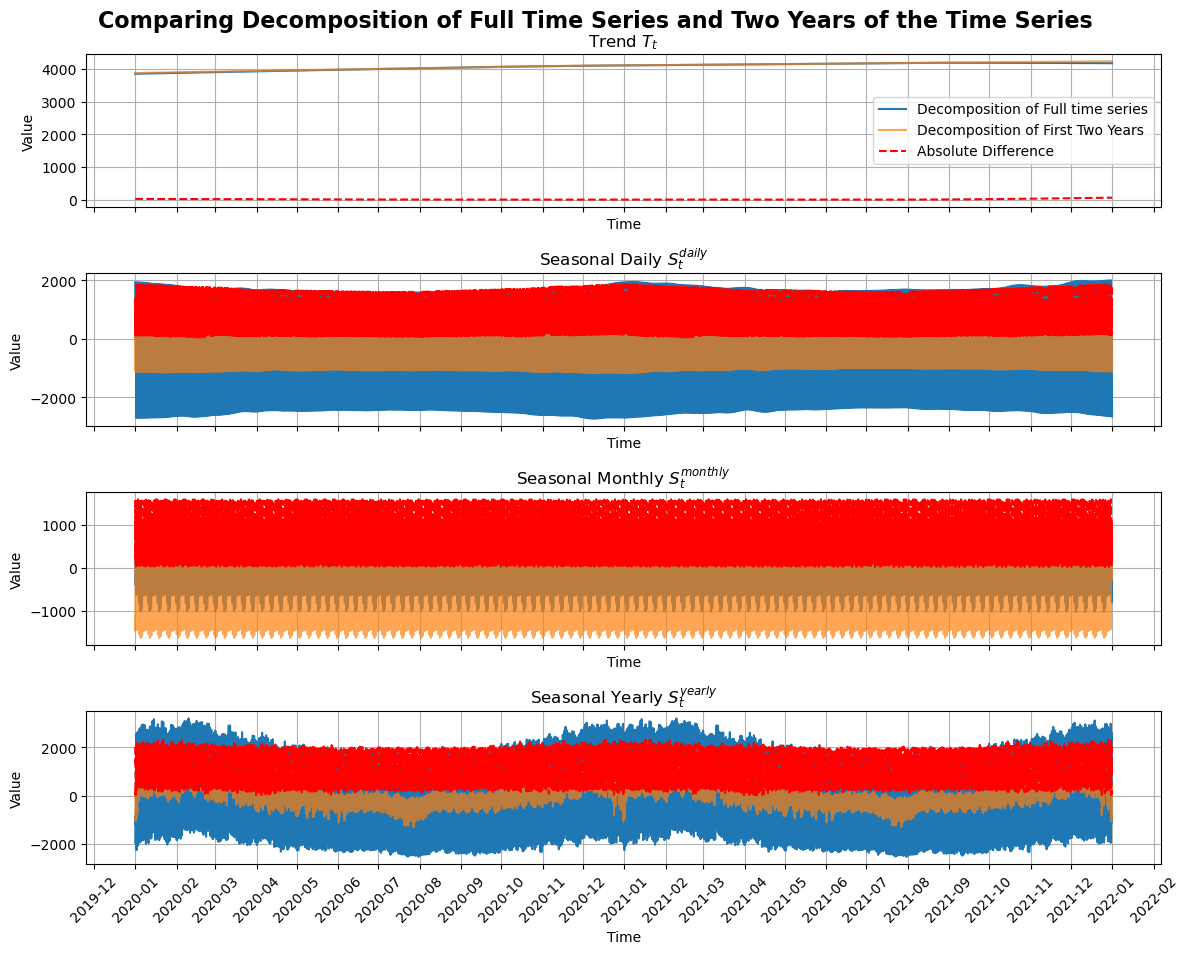

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure both DataFrames have 'start_time' as datetime if not already
MSTL_full['HourDK'] = pd.to_datetime(MSTL_full['HourDK'], utc=True)
MSTL_2year['HourDK'] = pd.to_datetime(MSTL_2year['HourDK'], utc=True)

# Aligning data for direct comparison
aligned_data = pd.merge(MSTL_full, MSTL_2year, on='HourDK', suffixes=('_before', '_2year'))

# Plotting
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 10), sharex=True)
titles = ['Trend $T_t$', 'Seasonal Daily $S_t^{daily}$', 'Seasonal Monthly $S_t^{monthly}$', 'Seasonal Yearly $S_t^{yearly}$', 'Remainder $R_t$']
columns = ['Trend', 'Seasonal24', 'Seasonal168', 'Seasonal8760', 'Remainder']

for i, (ax, title, column) in enumerate(zip(axes, titles, columns)):
    # Plot each component for both datasets
    ax.plot(aligned_data['HourDK'], aligned_data[f'{column}_before'], label='Decomposition of Full time series')
    ax.plot(aligned_data['HourDK'], aligned_data[f'{column}_2year'], label='Decomposition of First Two Years', alpha=0.7)

    # Calculate and plot the difference
    difference = aligned_data[f'{column}_before'] - aligned_data[f'{column}_2year']
    ax.plot(aligned_data['HourDK'], abs(difference), label='Absolute Difference', color='red', linestyle='--')

    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
    
    ax.set_title(title)
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')
    ax.grid(True)

    # Display legend only on the first plot
    if i == 0:
        ax.legend()

fig.suptitle('Comparing Decomposition of Full Time Series and Two Years of the Time Series', fontsize=16, fontweight='bold')

fig.tight_layout(rect=[0, 0.03, 1, 1.01])  # Adjust layout to make room for the title
plt.show()


## Plot for aggregated data

In [9]:
# Ensure both DataFrames have 'start_time' as datetime if not already
before_2022['start_time'] = pd.to_datetime(before_2022['start_time'], utc=True)
MSTL_2year['start_time'] = pd.to_datetime(MSTL_2year['start_time'], utc=True)

# Aggregating data by time across all zip codes and elvarme values
aggregated_before_2022 = before_2022.groupby('start_time').mean().reset_index()
aggregated_2year = MSTL_2year.groupby('start_time').mean().reset_index()

# Aligning aggregated data for direct comparison
aligned_data = pd.merge(aggregated_before_2022, aggregated_2year, on='start_time', suffixes=('_before', '_2year'))

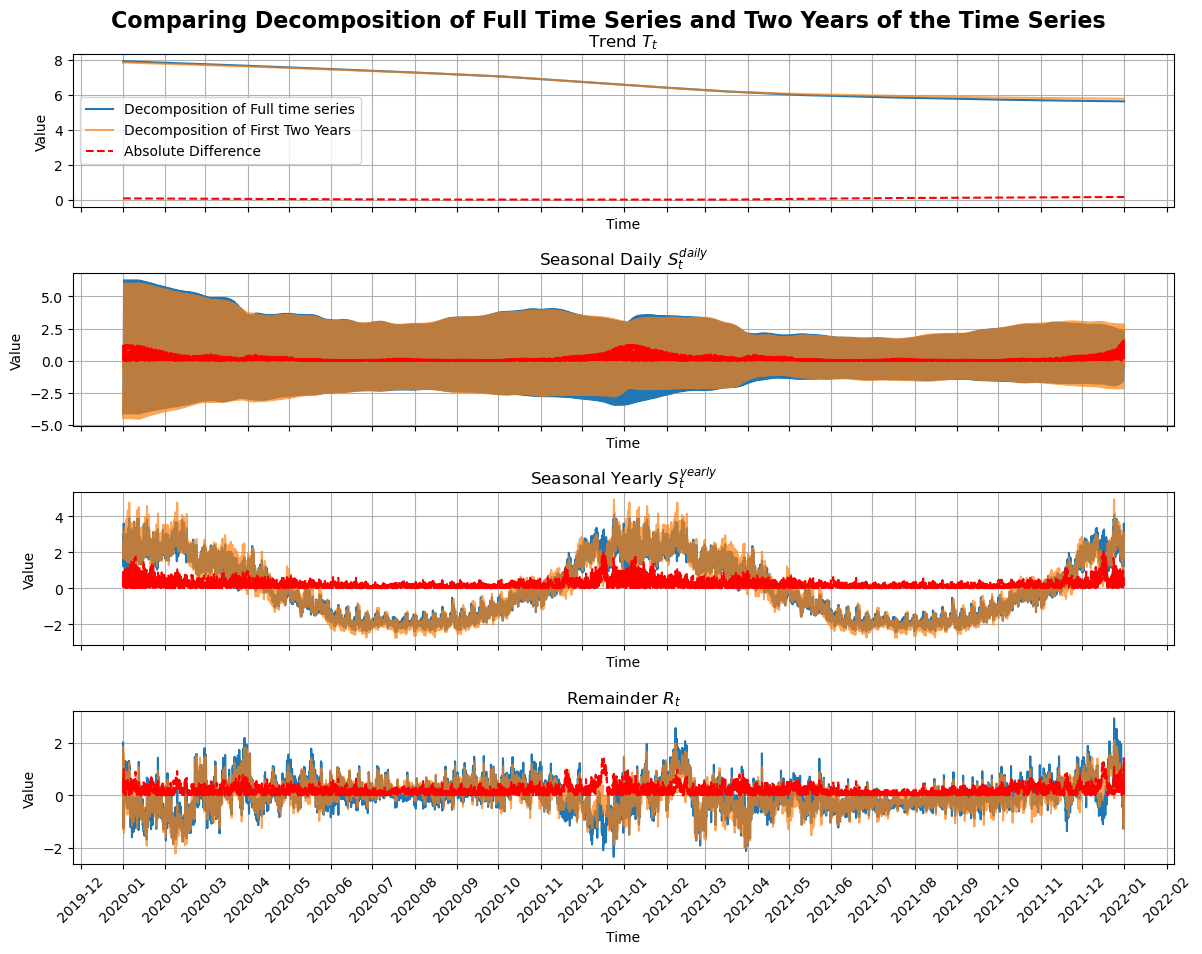

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Plotting
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 10), sharex=True)
titles = ['Trend $T_t$', 'Seasonal Daily $S_t^{daily}$', 'Seasonal Yearly $S_t^{yearly}$', 'Remainder $R_t$']
columns = ['Trend', 'Seasonal24', 'Seasonal8760', 'Remainder']

for i, (ax, title, column) in enumerate(zip(axes, titles, columns)):
    # Plot each component for both datasets
    ax.plot(aligned_data['start_time'], aligned_data[f'{column}_before'], label='Decomposition of Full time series')
    ax.plot(aligned_data['start_time'], aligned_data[f'{column}_2year'], label='Decomposition of First Two Years', alpha=0.7)

    # Calculate and plot the absolute difference
    difference = aligned_data[f'{column}_before'] - aligned_data[f'{column}_2year']
    ax.plot(aligned_data['start_time'], abs(difference), label='Absolute Difference', color='red', linestyle='--')

    # Setting date formatting for x-axis
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
    
    ax.set_title(title)
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')
    ax.grid(True)

    # Display legend only on the first plot
    if i == 0:
        ax.legend()

# Adding a centralized figure title
fig.suptitle('Comparing Decomposition of Full Time Series and Two Years of the Time Series', fontsize=16, fontweight='bold')

fig.tight_layout(rect=[0, 0.03, 1, 1.01])  # Adjust layout to make room for the title
plt.show()